## Random Sampling 
#### Good way of getting a representative value of huge datasets
#### Stratifed sampling is when random samples are takien after the total data is split into groups - e.g. split into age groups
#### Simple random sample samples results without breaking them up
#### Sample bias is when you misrepresent the population - e.g. polling one city in America when you want to understand trends for the entire country

## Selection Bias
#### Selection Bias - Bias that results from how observations in data are selected
#### Data Snooping - Searching through data in order to find something interesting within it. To prevent this it's good to split apart the data so that you have a section that you're not looking at prior to modelling that you can test your model on
#### Vast Search Effect - repeatingly run the model asking different questions to increase the chance that an outlier is deemed interesting
#### Target Shuffling - shuffling the target variable to show if the model is good or not. If the model gets worse from this then it's due to it being trained too much on one variable

## Sampling Distribution of a Statistic
#### Sampling statistics are statistics that we gather on the sample data - e.g. sample mean, sample median etc
#### Data Distributions are frequency distributions of individual values in a dataset
#### A Sampling Distribution is a combination of the two above concepts and is a *Data Distribution* of the values of the Sampling Distribution.
#### A Sampling Distribution is a combination of the two above concepts and is a *Data Distribution* of the values of the Sampling Distribution.

In [1]:
import pandas as pd 

In [2]:
player_data = pd.read_csv("data\\players.csv")
player_data

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [3]:
player_data["height_inches"] = player_data["height"].apply(lambda x: int(x.split("-")[0]) * 12 + int(x.split("-")[1]) if len(x.split("-")) == 2 else int(x))
player_data

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

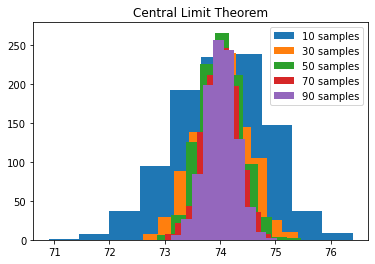

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(player_data["height_inches"].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

## this shows that the more samples you take the closer the centre of the normal distribution is the centre point which is most likely what the actual population mean is
## range(1000) refers to how many times a sample is taken at each sample range - e.g. for sample 10 it takes 10 samples 1000 times

## Standard Error
#### Single metric that sums up the variability in the sampling distribution for a statistic. You can estimate the standard error based on the standard deviation s and the number of values in the sample n. 


In [5]:
## As we increase the sample size the standard error decreases
player_data["height_inches"].sem()

0.05065243293253027

## Bootstrap
#### This is a sampling method where we draw resamples from a sample, replace the values in the resample back to the sample, then draw them again. There don't have to be any assumptions about the sample being normally distributed. To be clear, if you want to collect a sample of size n, then you'll pick a value, record it, put it back, then pick another value until you pick n values, meaning you can pick values more than once. You can implement bootstrapping in Python using skLearn:

#### This is a useful way of getting sample statistics but not good for small samples as you're putting back the value after it is recorded which means it's likely to be selected again in a small sample

In [6]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
	sample = resample(player_data["height_inches"])
	results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {player_data["height_inches"].mean()}')
print(f'bias: {results.mean() - player_data["height_inches"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 74.0106149341142
bias: 0.003797950219606605
std. error: 0.04878346692606823


## Confidence Intervals
#### Confidence Level: The percentage of confidence intervals constructed in the same way from the same population that are expected to contain the statistic of interest
#### **Confidence Intervals:** The interval that contains x% of the bootstrapped sample statistic you're gathering. You can calculate this using this methodology:

#### 1. Draw a random sample of size *n* with replacement (bootstrapping) from the data
#### 2. Record your sample statistic (mean, median etc)
#### 3. Repeat steps 1-2 multiple times
#### 4. For an x% confidence interval, trim $[(100 - x)/2]%$% results off the ends of the distribution
#### 5. The trim points define the bounds of the confidence interval

#### Confidence intervals are a great way of determining if more data needs to be calculated of if more research needs to be done into the phenomenon. If the bounds of the interval are too far apart from one another, then it can be a sign that not enough data was gathered. A larger confidence interval can also signal a more variable dataset. 


In [7]:
# If we have fewer than 30 items in our sample we can use a t-distribution

import numpy as np
import scipy.stats as st

data = player_data["height_inches"].sample(20) # define sample data

# create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(72.62902677626833, 75.97097322373166)

In [8]:
# Otherwise we can use the normal distribution as we can assume the sample mean is normally distributed. Remember, this doesn't mean the data itself is normally distributed.

import numpy as np
import scipy.stats as st

#define sample data
np.random.seed(0)
data = player_data["height_inches"].sample(1500)

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(73.92590128473445, 74.19009871526556)

## Normal/Gaussian Distribution
#### Error: Difference between an instance and a predicted average value
#### **Standardize:** Method of scaling data up or down such that you can compare it to a normal distribution
#### **Z-score:** Refers to the number of standard deviations above or below the mean that the value is.
#### QQ-plot: Otherwise known as a quantile-quantile plot, can be used to determine if a distribution of values is close to a normal distribution. If the QQ-plot is roughly diagonal going upwards left to right then it can be considered a normal distribution. This plot #### orders the z-scores from low to high, plotting the z-score on the y-axis and the x-axis is what quantile (percentile) that ranked value is in a normal distribution (theoretically what would the quantile be if the data were normal). 


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

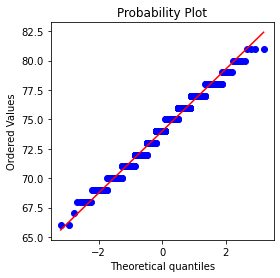

In [9]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = player_data["height_inches"].sample(1000)
stats.probplot(norm_sample, plot=ax)